<a href="https://colab.research.google.com/github/sindhura-nk/Artificial-Intelligence_2_1377/blob/main/Sentiment_Analysis_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Classification for Sentiment Analysis

## Read the dataset

In [1]:
path = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/Restaurant_Reviews.tsv"

In [2]:
import pandas as pd
df = pd.read_csv(path,sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Data Preprocessing

    Convert the data into lower case.
    Remove the unimportant content like punctuation marks(?!.) and special characteres(@#$%)

In [3]:
df['Review']

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."


In [4]:
df["Review"][0]

'Wow... Loved this place.'

In [5]:
text = df["Review"][0].lower()
text

'wow... loved this place.'

In [6]:
import re
pattern = r"[^a-z ]"
re.sub(pattern,"",text)

'wow loved this place'

In [7]:
txt2 = "This is'nt the correct way to do so...!!!"

In [8]:
re.sub(pattern,"",txt2)

'his isnt the correct way to do so'

In [9]:
def preprocess_text(text):
  # Convert the text into lower case
  text_new = text.lower()

  # replace the special characters with blank string
  pattern = r"[^a-z ]"
  text_updated = re.sub(pattern,"",text_new)
  return text_updated

In [10]:
df["Preprocessed Review"] = df["Review"].apply(preprocess_text)
df["Preprocessed Review"]

,Preprocessed Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...
...,...
995,i think food should have flavor and texture an...
996,appetite instantly gone
997,overall i was not impressed and would not go back
998,the whole experience was underwhelming and i t...


In [11]:
df.head()

,Review,Liked,Preprocessed Review
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


## Separate X and Y features

In [12]:
X = df["Preprocessed Review"]
Y = df["Liked"]

In [13]:
X.head()

,Preprocessed Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


In [14]:
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


## TFIDF: Tokenization

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer()
xpre = tfidf.fit_transform(X).toarray()
xpre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
xpre[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
xpre.shape

(1000, 2046)

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xpre,Y,train_size=0.8,random_state=21)

In [20]:
xtrain.shape

(800, 2046)

In [21]:
xtest.shape

(200, 2046)

## Build the Neural Network

In [22]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [23]:
model =  Sequential()
# Input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Hidden layer 1
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.2))
# Hidden layer 2
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(rate=0.1))
# Output layer
model.add(Dense(units=1,activation="sigmoid"))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       131,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,121 (520.00 KB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
es = EarlyStopping(monitor="val_loss",patience=10)

In [27]:
hist = model.fit(xtrain,ytrain,validation_split=0.1,epochs=15,callbacks=[es])

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.5201 - loss: 0.6919 - val_accuracy: 0.4625 - val_loss: 0.6894
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7296 - loss: 0.6726 - val_accuracy: 0.5250 - val_loss: 0.6738
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8434 - loss: 0.6199 - val_accuracy: 0.7625 - val_loss: 0.6207
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9316 - loss: 0.5033 - val_accuracy: 0.7750 - val_loss: 0.5412
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9696 - loss: 0.3219 - val_accuracy: 0.7875 - val_loss: 0.4570
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9893 - loss: 0.1754 - val_accuracy: 0.7875 - val_loss: 0.4367
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9959 - loss: 0.0950 - val_accuracy: 0.7250 - val_loss: 0.4700
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9928 - loss: 0.0606 - val_accuracy: 0.7375 - val_los

## Evaluate the model

## LEarning Curve

Text(0, 0.5, 'Loss')

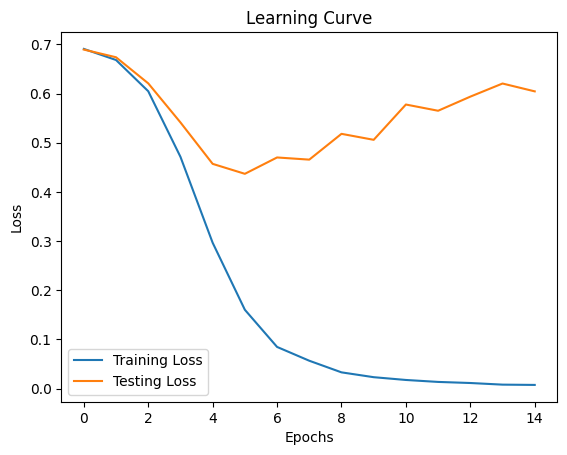

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Testing Loss")
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'accuracy')

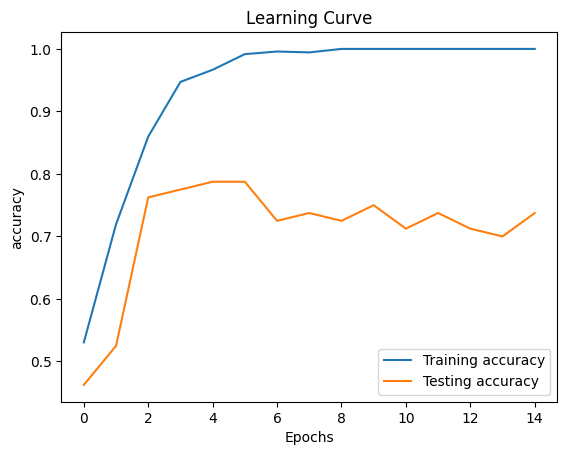

In [29]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"],label="Training accuracy")
plt.plot(hist.history["val_accuracy"],label="Testing accuracy")
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

In [30]:
model.evaluate(xtrain,ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9969 - loss: 0.0109


[0.06396382302045822, 0.9737499952316284]

In [31]:
model.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8365 - loss: 0.3805


[0.4805328845977783, 0.800000011920929]

## COnfusion Matrix

## Classification Report

## Model Predictions

In [32]:
preprocess_text(txt2)

'this isnt the correct way to do so'

In [33]:
review = "Food tasted great. WIll visit agAIN..!!"

In [36]:
def predict(text):
  t1 = preprocess_text(text)
  token = tfidf.transform([t1])
  probs = model.predict(token)
  return probs

In [37]:
predict(review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


array([[0.9990006]], dtype=float32)

In [38]:
def predict(text):
  t1 = preprocess_text(text)
  token = tfidf.transform([t1])
  probs = model.predict(token)
  if probs>=0.5:
    return 1
  else:
    return 0

In [39]:
predict(review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


1

In [40]:
## IF your out of sample predictions are in file format, load them into dataframe
## Use the below method to predict final predictions. Assume the new data contains review_new column with new reviews
# df_new["Predictions"] = df["review_new"].apply(predict)

In [41]:
model.save("SentimentAnalysis.keras")

In [42]:
## To load the model
from keras.models import load_model
m1 = load_model('/content/SentimentAnalysis.keras')
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       131,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,365 (1.52 MB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266,244 (1.02 MB)